In [1]:
import pandas as pd
import numpy as np
import glob

import time

from scipy import linalg

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

In [3]:
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances


from scipy.spatial.distance import squareform



In [32]:
def eof_dimension_reduction(X):
    covariance_array = np.dot(X.T, X) 
    #print(covariance_array.shape)

    e_vals, e_vecs = linalg.eig(covariance_array)
    pc_mat = np.dot(X, e_vecs)
    
    print(e_vecs.shape)
    
    return pc_mat, e_vals, e_vecs 

# Example

In [8]:
X, y = load_digits(return_X_y=True)

In [9]:
X.shape

(1797, 64)

In [10]:
y.shape

(1797,)

In [33]:
pc_mat, e_vals, e_vecs  = eof_dimension_reduction(X)

(64, 64)


In [34]:
pc_mat.shape

(1797, 64)

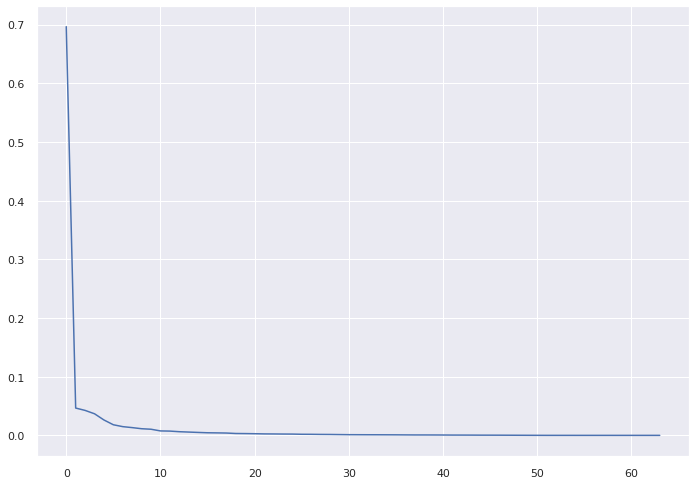

In [29]:
plt.plot(e_vals/np.sum(e_vals))

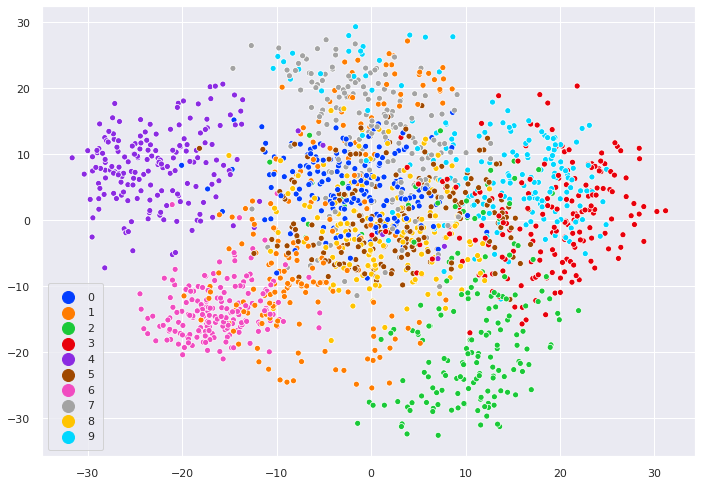

In [51]:
sns.scatterplot(pc_mat[:,1], pc_mat[:,3], hue=y, legend='full', palette=palette)

# Embedding EOF

In [52]:

filtered_files = glob.glob("comments/raw_comments/*_filtered.fea")

In [ ]:
for file in filtered_files:
    
    print(file)
    df_sales = pd.read_feather(file)
    print(len(df_sales))
    tic = time.time()
    
    embed_file = file.split('.')[0] + '_embedding.fea'
    df_sales_embeddings = pd.read_feather(embed_file) 
    
    column_names = ['PCS_embeddings_' + str(i) for i in range(512)]
    
    embedding_array = df_sales_embeddings.iloc[:,1:].to_numpy()
    
    embedding_array_embedded = eof_dimension_reduction(embedding_array)
    
    embedding_array_embedded_pcs = pd.DataFrame(embedding_array_embedded[0], 
                                                index=df_sales_embeddings.index,
                                                columns=column_names)
    
    noun_file = file.split('.')[0] + '_embedding_pcs.fea'
    embedding_array_embedded_pcs.to_feather(noun_file)
    
    print(time.time()-tic)

comments/raw_comments/agent_comments_AL_filtered.fea
219915
(512, 512)
239.46607184410095
comments/raw_comments/agent_comments_AR_filtered.fea
100806
(512, 512)
111.98666596412659
comments/raw_comments/agent_comments_AZ_filtered.fea
405421
(512, 512)
438.06961154937744
comments/raw_comments/agent_comments_CA_filtered.fea
2103405
(512, 512)
2298.2319128513336
comments/raw_comments/agent_comments_CO_filtered.fea
588449
(512, 512)
171.09488534927368
comments/raw_comments/agent_comments_CT_filtered.fea
323150
(512, 512)
350.63928055763245
comments/raw_comments/agent_comments_DC_filtered.fea
5970
(512, 512)
1.8245790004730225
comments/raw_comments/agent_comments_DE_filtered.fea
28154
(512, 512)
2.850438117980957
comments/raw_comments/agent_comments_FL_filtered.fea
1904538
(512, 512)


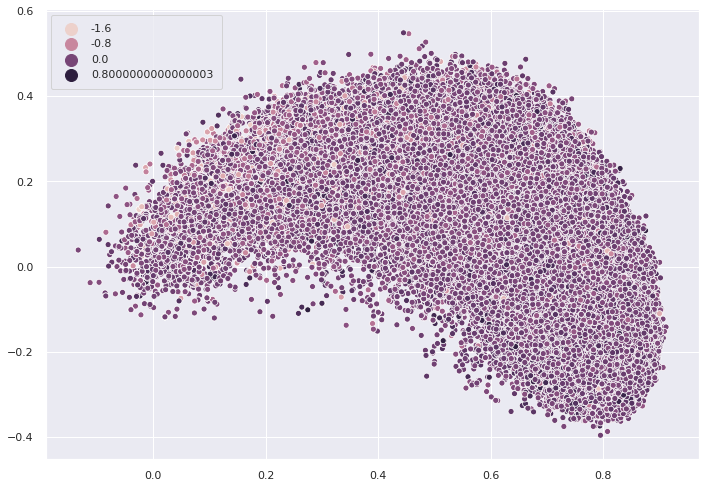

In [48]:
sns.scatterplot(embedding_array_embedded[0][:,0], embedding_array_embedded[0][:,1], 
                hue=df_sales.avmerror.values)